In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedNum.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,1071.834493
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,1033.190422
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,994.546350
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,955.902279
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,928.473553
...,...,...,...,...,...,...
119,2019-11-30,1146.881815,433.816967,436.290714,460.509240,733.164793
120,2019-12-31,1111.642375,415.370593,431.490513,417.984787,729.764211
121,2020-01-31,1142.095113,422.618925,430.139254,424.521959,737.713784
122,2020-02-29,1172.547851,429.867258,428.787994,431.059130,745.663358


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 1071.834493],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 1033.1904216666667],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 994.5463503333333],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        955.902279],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 928.4735526333333],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 901.0448262666665],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 161.7374879,
        873.6160999],
       ['2010-07-31', 1853.240114, 1015.1698886666666, 421.8261523,
        187.6358415, 863.0179451333332],
       ['2010-08-31', 1834.087986, 1008.9719983333333, 408.0485689,
        213.5341951, 852.4

In [6]:
X = dataset[:,1:5]
Y = dataset[:,5]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.38276953, 0.48490881, 0.28760773, 1.        ],
       [0.38286577, 0.49144556, 0.32225043, 0.9605532 ],
       [0.38296201, 0.4979823 , 0.35689312, 0.92110641],
       [0.38305824, 0.50451905, 0.39153581, 0.88165961],
       [0.38098387, 0.51099945, 0.30995679, 0.58777307],
       [0.3789095 , 0.51747985, 0.22837778, 0.29388654],
       [0.37683513, 0.52396025, 0.14679876, 0.        ],
       [0.36734818, 0.5186014 , 0.09786584, 0.0434695 ],
       [0.35786123, 0.51324255, 0.04893292, 0.086939  ],
       [0.34837428, 0.5078837 , 0.        , 0.1304085 ],
       [0.36639744, 0.51287461, 0.05993416, 0.14266337],
       [0.3844206 , 0.51786552, 0.11986831, 0.15491825],
       [0.40244375, 0.52285643, 0.17980247, 0.16717312],
       [0.36110259, 0.50921367, 0.15952074, 0.15377192],
       [0.31976144, 0.49557092, 0.13923902, 0.14037072],
       [0.27842028, 0.48192816, 0.1189573 , 0.12696952],
       [0.29020478, 0.45689534, 0.12775618, 0.12639516],
       [0.30198928, 0.43186251,

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(99, 4) (12, 4) (13, 4) (99,) (12,) (13,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(4,)),
    Dense(32, activation='elu'),
    Dense(12, activation='elu'),
    Dense(1, activation='elu'),
])
#softplus, selu, elu

In [13]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=64, epochs=1500,
          validation_data=(X_val, Y_val), verbose=1)

Train on 99 samples, validate on 12 samples
Epoch 1/1500
99/99 [==============================] - 0s 3ms/step - loss: 740.0318 - val_loss: 715.3510
Epoch 2/1500
99/99 [==============================] - 0s 81us/step - loss: 739.9678 - val_loss: 715.2849
Epoch 3/1500
99/99 [==============================] - 0s 81us/step - loss: 739.9015 - val_loss: 715.2122
Epoch 4/1500
99/99 [==============================] - 0s 91us/step - loss: 739.8292 - val_loss: 715.1382
Epoch 5/1500
99/99 [==============================] - 0s 105us/step - loss: 739.7568 - val_loss: 715.0648
Epoch 6/1500
99/99 [==============================] - 0s 91us/step - loss: 739.6843 - val_loss: 714.9907
Epoch 7/1500
99/99 [==============================] - 0s 91us/step - loss: 739.6116 - val_loss: 714.9160
Epoch 8/1500
99/99 [==============================] - 0s 81us/step - loss: 739.5386 - val_loss: 714.8403
Epoch 9/1500
99/99 [==============================] - 0s 111us/step - loss: 739.4636 - val_loss: 714.7636
Epoch 10/1

Epoch 78/1500
99/99 [==============================] - 0s 71us/step - loss: 718.1819 - val_loss: 692.4761
Epoch 79/1500
99/99 [==============================] - 0s 81us/step - loss: 717.2762 - val_loss: 691.5179
Epoch 80/1500
99/99 [==============================] - 0s 61us/step - loss: 716.3301 - val_loss: 690.5257
Epoch 81/1500
99/99 [==============================] - 0s 81us/step - loss: 715.3473 - val_loss: 689.4995
Epoch 82/1500
99/99 [==============================] - 0s 71us/step - loss: 714.3306 - val_loss: 688.4380
Epoch 83/1500
99/99 [==============================] - 0s 81us/step - loss: 713.2739 - val_loss: 687.3401
Epoch 84/1500
99/99 [==============================] - 0s 81us/step - loss: 712.1845 - val_loss: 686.2039
Epoch 85/1500
99/99 [==============================] - 0s 71us/step - loss: 711.0665 - val_loss: 685.0283
Epoch 86/1500
99/99 [==============================] - 0s 71us/step - loss: 709.8995 - val_loss: 683.8140
Epoch 87/1500
99/99 [=========================

99/99 [==============================] - 0s 71us/step - loss: 144.9167 - val_loss: 171.9248
Epoch 231/1500
99/99 [==============================] - 0s 81us/step - loss: 144.6809 - val_loss: 171.9245
Epoch 232/1500
99/99 [==============================] - 0s 71us/step - loss: 144.4396 - val_loss: 171.8728
Epoch 233/1500
99/99 [==============================] - 0s 71us/step - loss: 144.1749 - val_loss: 171.7678
Epoch 234/1500
99/99 [==============================] - 0s 61us/step - loss: 143.9579 - val_loss: 171.6373
Epoch 235/1500
99/99 [==============================] - 0s 71us/step - loss: 143.7322 - val_loss: 171.5043
Epoch 236/1500
99/99 [==============================] - 0s 81us/step - loss: 143.5126 - val_loss: 171.3812
Epoch 237/1500
99/99 [==============================] - 0s 91us/step - loss: 143.2963 - val_loss: 171.2744
Epoch 238/1500
99/99 [==============================] - 0s 81us/step - loss: 143.0805 - val_loss: 171.1852
Epoch 239/1500
99/99 [==============================

99/99 [==============================] - 0s 61us/step - loss: 115.0734 - val_loss: 139.8574
Epoch 383/1500
99/99 [==============================] - 0s 71us/step - loss: 114.8651 - val_loss: 139.6002
Epoch 384/1500
99/99 [==============================] - 0s 71us/step - loss: 114.6830 - val_loss: 139.3340
Epoch 385/1500
99/99 [==============================] - 0s 71us/step - loss: 114.4814 - val_loss: 139.0191
Epoch 386/1500
99/99 [==============================] - 0s 81us/step - loss: 114.3268 - val_loss: 138.7222
Epoch 387/1500
99/99 [==============================] - 0s 91us/step - loss: 114.1232 - val_loss: 138.4665
Epoch 388/1500
99/99 [==============================] - 0s 91us/step - loss: 113.9401 - val_loss: 138.2275
Epoch 389/1500
99/99 [==============================] - 0s 81us/step - loss: 113.7445 - val_loss: 137.9993
Epoch 390/1500
99/99 [==============================] - 0s 81us/step - loss: 113.5592 - val_loss: 137.7756
Epoch 391/1500
99/99 [==============================

99/99 [==============================] - 0s 71us/step - loss: 85.5920 - val_loss: 107.2837
Epoch 536/1500
99/99 [==============================] - 0s 61us/step - loss: 85.3955 - val_loss: 107.1231
Epoch 537/1500
99/99 [==============================] - 0s 61us/step - loss: 85.2145 - val_loss: 106.9692
Epoch 538/1500
99/99 [==============================] - 0s 71us/step - loss: 85.0141 - val_loss: 106.8063
Epoch 539/1500
99/99 [==============================] - 0s 81us/step - loss: 84.8559 - val_loss: 106.6574
Epoch 540/1500
99/99 [==============================] - 0s 71us/step - loss: 84.6729 - val_loss: 106.5344
Epoch 541/1500
99/99 [==============================] - 0s 71us/step - loss: 84.4694 - val_loss: 106.3538
Epoch 542/1500
99/99 [==============================] - 0s 81us/step - loss: 84.2924 - val_loss: 106.1542
Epoch 543/1500
99/99 [==============================] - 0s 141us/step - loss: 84.0994 - val_loss: 105.9502
Epoch 544/1500
99/99 [==============================] - 0s 9

Epoch 613/1500
99/99 [==============================] - 0s 81us/step - loss: 70.8864 - val_loss: 89.9754
Epoch 614/1500
99/99 [==============================] - 0s 71us/step - loss: 70.6986 - val_loss: 89.7528
Epoch 615/1500
99/99 [==============================] - 0s 71us/step - loss: 70.5196 - val_loss: 89.5361
Epoch 616/1500
99/99 [==============================] - 0s 81us/step - loss: 70.3315 - val_loss: 89.3164
Epoch 617/1500
99/99 [==============================] - 0s 71us/step - loss: 70.1537 - val_loss: 89.0920
Epoch 618/1500
99/99 [==============================] - 0s 61us/step - loss: 69.9737 - val_loss: 88.8750
Epoch 619/1500
99/99 [==============================] - 0s 71us/step - loss: 69.8098 - val_loss: 88.6769
Epoch 620/1500
99/99 [==============================] - 0s 71us/step - loss: 69.5954 - val_loss: 88.4554
Epoch 621/1500
99/99 [==============================] - 0s 81us/step - loss: 69.4103 - val_loss: 88.2415
Epoch 622/1500
99/99 [==============================] -

99/99 [==============================] - 0s 81us/step - loss: 58.5159 - val_loss: 74.0062
Epoch 692/1500
99/99 [==============================] - 0s 61us/step - loss: 58.4484 - val_loss: 73.8495
Epoch 693/1500
99/99 [==============================] - 0s 81us/step - loss: 58.3600 - val_loss: 73.6982
Epoch 694/1500
99/99 [==============================] - 0s 71us/step - loss: 58.2791 - val_loss: 73.5375
Epoch 695/1500
99/99 [==============================] - 0s 71us/step - loss: 58.2030 - val_loss: 73.3794
Epoch 696/1500
99/99 [==============================] - 0s 61us/step - loss: 58.1413 - val_loss: 73.2226
Epoch 697/1500
99/99 [==============================] - 0s 81us/step - loss: 58.0840 - val_loss: 73.0676
Epoch 698/1500
99/99 [==============================] - 0s 71us/step - loss: 58.0134 - val_loss: 72.9248
Epoch 699/1500
99/99 [==============================] - 0s 81us/step - loss: 57.9341 - val_loss: 72.7898
Epoch 700/1500
99/99 [==============================] - 0s 71us/step -

99/99 [==============================] - 0s 71us/step - loss: 53.6312 - val_loss: 63.5693
Epoch 848/1500
99/99 [==============================] - 0s 61us/step - loss: 53.6232 - val_loss: 63.5458
Epoch 849/1500
99/99 [==============================] - 0s 81us/step - loss: 53.6180 - val_loss: 63.5055
Epoch 850/1500
99/99 [==============================] - 0s 81us/step - loss: 53.6103 - val_loss: 63.5047
Epoch 851/1500
99/99 [==============================] - 0s 81us/step - loss: 53.6038 - val_loss: 63.4970
Epoch 852/1500
99/99 [==============================] - 0s 71us/step - loss: 53.6180 - val_loss: 63.4840
Epoch 853/1500
99/99 [==============================] - 0s 71us/step - loss: 53.5715 - val_loss: 63.5960
Epoch 854/1500
99/99 [==============================] - 0s 71us/step - loss: 53.5533 - val_loss: 63.7084
Epoch 855/1500
99/99 [==============================] - 0s 61us/step - loss: 53.6138 - val_loss: 63.8399
Epoch 856/1500
99/99 [==============================] - 0s 81us/step -

99/99 [==============================] - 0s 71us/step - loss: 53.1583 - val_loss: 63.4045
Epoch 926/1500
99/99 [==============================] - 0s 71us/step - loss: 53.1449 - val_loss: 63.4171
Epoch 927/1500
99/99 [==============================] - 0s 81us/step - loss: 53.1606 - val_loss: 63.3918
Epoch 928/1500
99/99 [==============================] - 0s 71us/step - loss: 53.1424 - val_loss: 63.2754
Epoch 929/1500
99/99 [==============================] - 0s 91us/step - loss: 53.1674 - val_loss: 63.2225
Epoch 930/1500
99/99 [==============================] - 0s 81us/step - loss: 53.1526 - val_loss: 63.2766
Epoch 931/1500
99/99 [==============================] - 0s 81us/step - loss: 53.1247 - val_loss: 63.3026
Epoch 932/1500
99/99 [==============================] - 0s 71us/step - loss: 53.1352 - val_loss: 63.3428
Epoch 933/1500
99/99 [==============================] - 0s 91us/step - loss: 53.1114 - val_loss: 63.3230
Epoch 934/1500
99/99 [==============================] - 0s 91us/step -

Epoch 1003/1500
99/99 [==============================] - 0s 101us/step - loss: 52.8134 - val_loss: 62.4755
Epoch 1004/1500
99/99 [==============================] - 0s 91us/step - loss: 52.8185 - val_loss: 62.4882
Epoch 1005/1500
99/99 [==============================] - 0s 71us/step - loss: 52.7993 - val_loss: 62.4732
Epoch 1006/1500
99/99 [==============================] - 0s 91us/step - loss: 52.7962 - val_loss: 62.4866
Epoch 1007/1500
99/99 [==============================] - 0s 61us/step - loss: 52.7941 - val_loss: 62.5368
Epoch 1008/1500
99/99 [==============================] - 0s 81us/step - loss: 52.7695 - val_loss: 62.5697
Epoch 1009/1500
99/99 [==============================] - 0s 101us/step - loss: 52.7867 - val_loss: 62.6275
Epoch 1010/1500
99/99 [==============================] - 0s 81us/step - loss: 52.7525 - val_loss: 62.6037
Epoch 1011/1500
99/99 [==============================] - 0s 81us/step - loss: 52.7491 - val_loss: 62.5851
Epoch 1012/1500
99/99 [=====================

99/99 [==============================] - 0s 61us/step - loss: 52.2697 - val_loss: 62.1348
Epoch 1158/1500
99/99 [==============================] - 0s 141us/step - loss: 52.2527 - val_loss: 62.2818
Epoch 1159/1500
99/99 [==============================] - 0s 81us/step - loss: 52.2740 - val_loss: 62.3860
Epoch 1160/1500
99/99 [==============================] - 0s 71us/step - loss: 52.2597 - val_loss: 62.2993
Epoch 1161/1500
99/99 [==============================] - 0s 81us/step - loss: 52.2530 - val_loss: 62.2376
Epoch 1162/1500
99/99 [==============================] - 0s 81us/step - loss: 52.2470 - val_loss: 62.1804
Epoch 1163/1500
99/99 [==============================] - 0s 71us/step - loss: 52.2532 - val_loss: 62.1365
Epoch 1164/1500
99/99 [==============================] - 0s 101us/step - loss: 52.2457 - val_loss: 62.1817
Epoch 1165/1500
99/99 [==============================] - 0s 71us/step - loss: 52.2683 - val_loss: 62.3206
Epoch 1166/1500
99/99 [==============================] - 0s 

99/99 [==============================] - 0s 81us/step - loss: 52.1447 - val_loss: 62.6089
Epoch 1235/1500
99/99 [==============================] - 0s 71us/step - loss: 52.0911 - val_loss: 62.2761
Epoch 1236/1500
99/99 [==============================] - 0s 81us/step - loss: 52.1505 - val_loss: 61.9473
Epoch 1237/1500
99/99 [==============================] - 0s 61us/step - loss: 52.1877 - val_loss: 61.9126
Epoch 1238/1500
99/99 [==============================] - 0s 111us/step - loss: 52.2489 - val_loss: 62.1648
Epoch 1239/1500
99/99 [==============================] - 0s 91us/step - loss: 52.1262 - val_loss: 62.2324
Epoch 1240/1500
99/99 [==============================] - 0s 81us/step - loss: 52.1258 - val_loss: 62.3199
Epoch 1241/1500
99/99 [==============================] - 0s 91us/step - loss: 52.0956 - val_loss: 62.5577
Epoch 1242/1500
99/99 [==============================] - 0s 71us/step - loss: 52.1567 - val_loss: 62.7411
Epoch 1243/1500
99/99 [==============================] - 0s 8

Epoch 1311/1500
99/99 [==============================] - 0s 101us/step - loss: 52.0581 - val_loss: 62.6211
Epoch 1312/1500
99/99 [==============================] - 0s 71us/step - loss: 52.0455 - val_loss: 62.4379
Epoch 1313/1500
99/99 [==============================] - 0s 121us/step - loss: 52.0134 - val_loss: 62.1474
Epoch 1314/1500
99/99 [==============================] - 0s 91us/step - loss: 52.0165 - val_loss: 61.9229
Epoch 1315/1500
99/99 [==============================] - 0s 71us/step - loss: 52.0285 - val_loss: 61.9001
Epoch 1316/1500
99/99 [==============================] - 0s 91us/step - loss: 52.0210 - val_loss: 62.0521
Epoch 1317/1500
99/99 [==============================] - 0s 61us/step - loss: 52.1119 - val_loss: 62.2561
Epoch 1318/1500
99/99 [==============================] - 0s 81us/step - loss: 52.0104 - val_loss: 62.1779
Epoch 1319/1500
99/99 [==============================] - 0s 91us/step - loss: 52.0089 - val_loss: 62.1802
Epoch 1320/1500
99/99 [=====================

Epoch 1388/1500
99/99 [==============================] - 0s 81us/step - loss: 51.9413 - val_loss: 62.0366
Epoch 1389/1500
99/99 [==============================] - 0s 101us/step - loss: 51.9469 - val_loss: 62.1066
Epoch 1390/1500
99/99 [==============================] - 0s 71us/step - loss: 51.9133 - val_loss: 61.9892
Epoch 1391/1500
99/99 [==============================] - 0s 71us/step - loss: 51.9347 - val_loss: 61.8877
Epoch 1392/1500
99/99 [==============================] - 0s 81us/step - loss: 51.9278 - val_loss: 61.9716
Epoch 1393/1500
99/99 [==============================] - 0s 81us/step - loss: 51.9355 - val_loss: 62.2241
Epoch 1394/1500
99/99 [==============================] - 0s 81us/step - loss: 51.9292 - val_loss: 62.2838
Epoch 1395/1500
99/99 [==============================] - 0s 111us/step - loss: 51.9169 - val_loss: 62.1633
Epoch 1396/1500
99/99 [==============================] - 0s 71us/step - loss: 51.9108 - val_loss: 62.0624
Epoch 1397/1500
99/99 [=====================

In [15]:
import matplotlib.pyplot as plt

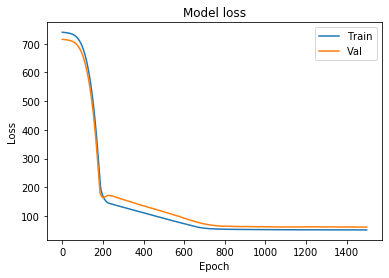

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()